# Распознавание рукописных цифр с помощью Keras



### MNIST -- база данных с экземплярами рукописных цифр, встроенная в библиотеку Keras

60 000 изображений -- обучающая выборка 

10 000 изображений -- тестовая выборка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

### Загрузка экземпляров

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Нормализация входного вектора (0 - чёрный, 255 - белый)

In [3]:
x_train = x_train / 255
x_test = x_test / 255

### Преобразование выходного вектора к числовому виду
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] --> 2

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

### Отображение первых 25-и экземпляров выборки

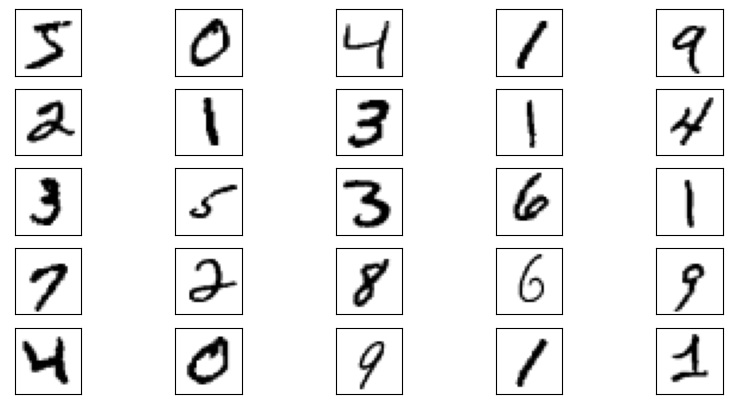

In [5]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    

### Создание модели полносвязной НС и вывод её структуры

Param # -- указывает на количество весовых коэффициентов, которые наша модкль будет подбирать.

128 нейронов * (784 параметр + 1 отступ) = 100480

(128 нейронов + 1 отступ) * 10 = 1290


In [7]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### Компиляция НС с оптимизацией по Adam и критерием качества -- категориальная кросс-энтропия

In [8]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

### Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [9]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2912 - accuracy: 0.9175 - val_loss: 0.1652 - val_accuracy: 0.9529
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1333 - accuracy: 0.9618 - val_loss: 0.1166 - val_accuracy: 0.9656
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0917 - accuracy: 0.9728 - val_loss: 0.1022 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0942 - val_accuracy: 0.9725
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0885 - val_accuracy: 0.9746


### Проверка модели на тестовой выборке

In [10]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9763


[0.0779835432767868, 0.9763000011444092]

### History

In [11]:
print(his.history)

{'loss': [0.2869861125946045, 0.1276199370622635, 0.08623379468917847, 0.06324227154254913, 0.04740717634558678], 'accuracy': [0.9182500243186951, 0.9625625014305115, 0.9736666679382324, 0.9811875224113464, 0.9851874709129333], 'val_loss': [0.16088098287582397, 0.11786453425884247, 0.09636254608631134, 0.09622851759195328, 0.0988479033112526], 'val_accuracy': [0.9547500014305115, 0.9635833501815796, 0.9704166650772095, 0.9728333353996277, 0.9705833196640015]}


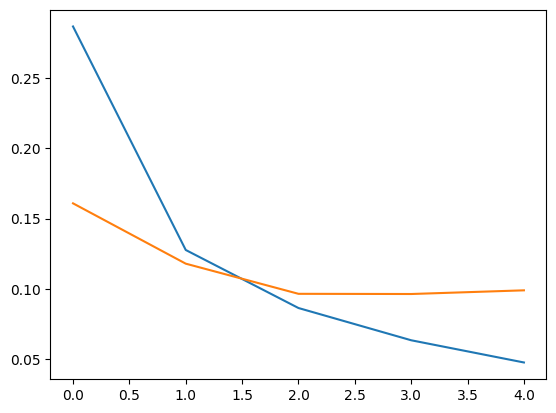

In [12]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

### Проверка распознавания конкретной цифры

np.expand_dims() -- предтавление езображение в виде трёхмерного тензора.

1/1 [==============================] - 0s 468ms/step
[[4.6523255e-08 8.0841289e-09 5.6601662e-06 5.5768102e-04 2.0711694e-12
  6.2303108e-08 2.4241584e-13 9.9943429e-01 1.3036986e-07 2.0157245e-06]]

Распознанная цифра: 7


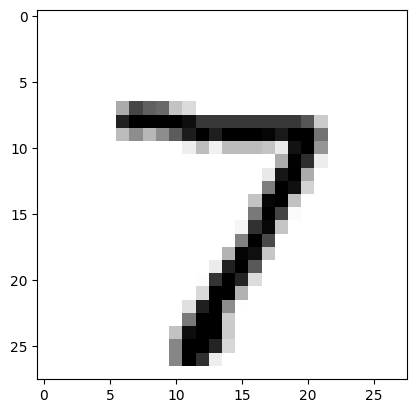

In [11]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'\nРаспознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


### Выделение неверных результатов распознавания

In [35]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

# print(pred.shape)

print('Нейронная сеть предсказала:', pred[:20])
print('Истинные значения:', y_test[:20])

313/313 [==============================] - 1s 2ms/step
Нейронная сеть предсказала: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Истинные значения: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


### Количество неправильно распознанных мзображений (кол-во, )

In [36]:
mask = pred == y_test
# print(mask[:10])
x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape[0])

208


### Вывод пяти неверных результатов

Знаение сети: 7


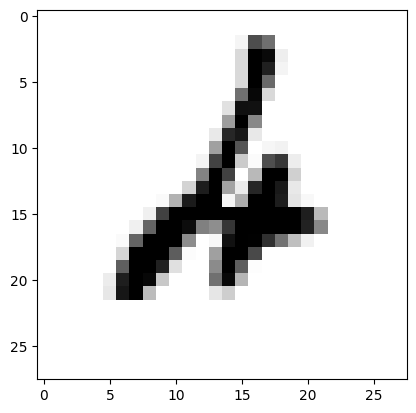

Знаение сети: 2


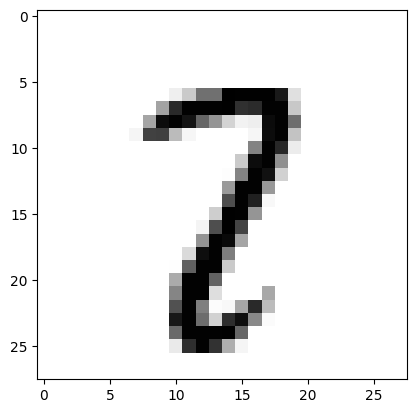

Знаение сети: 1


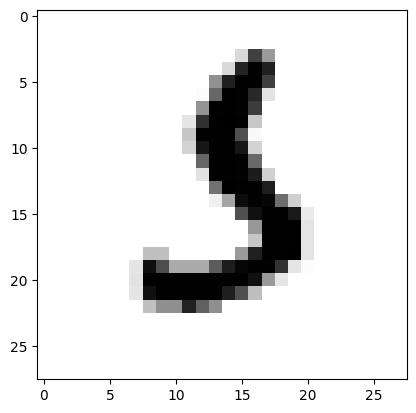

Знаение сети: 0


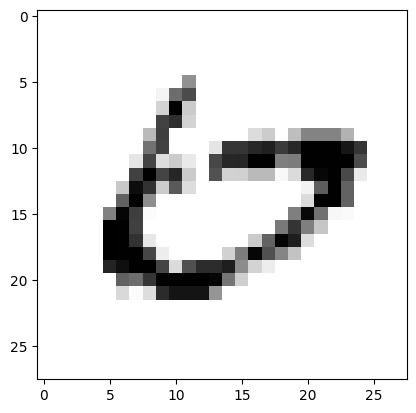

Знаение сети: 4


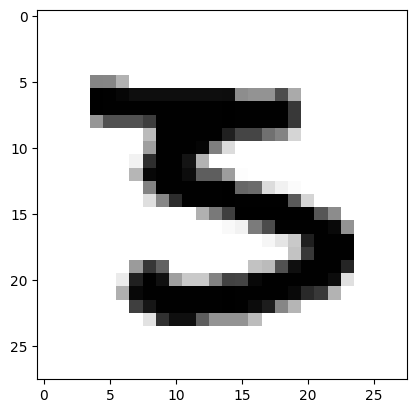

In [37]:
for i in range(5):
    print(f'Знаение сети: {y_test[i]}')
    plt.imshow(x_false[i],cmap=plt.cm.binary)
    plt.show()